for comment -> control + command + .


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import optuna

from utils_metrics import get_error_metrics

from utils_plot import plot_pred3
with open('/content/drive/MyDrive/siat_dataset/outputs/experiment_vars_all_kfold_stance_0421_best.obj', 'rb') as fp:
    data_selected, df_results_overall, best_trial_params, best_trial_dict = pickle.load(fp)

best_trial_params

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 6.2 MB/s eta 0:00:00


{'both': {'learning_rate': 0.0013182096016988853,
  'weight_decay': 0.00048705464892821574,
  'hidden_dim': 44,
  'layer_dim': 2,
  'num_epoch': 200},
 'emg': {'learning_rate': 0.0006769154555056141,
  'weight_decay': 0.00026408700302398247,
  'hidden_dim': 87,
  'layer_dim': 3,
  'num_epoch': 200},
 'angle': {'learning_rate': 0.0007478196090064676,
  'weight_decay': 5.5844157531273585e-05,
  'hidden_dim': 72,
  'layer_dim': 4,
  'num_epoch': 200}}

In [ ]:
df_results_overall['combined'] = pd.DataFrame()
for experiment in [f for f in df_results_overall if 'use' in f]:
    experiment_name = experiment.replace('use_','')
    for fold in [f for f in df_results_overall[experiment] if 'fold' in f]:
        df_temp = df_results_overall[experiment][fold].reset_index()
        df_temp['experiment'] = experiment_name
        df_temp['fold'] = fold
        df_results_overall['combined'] = pd.concat([df_results_overall['combined'], df_temp], axis=0, ignore_index=True)
df_results_overall['combined'] = df_results_overall['combined'].sort_index()
df_results_overall_combined = df_results_overall['combined']

print(df_results_overall_combined.shape)
df_results_overall_combined.head(3)

(600, 21)


,test_df_idx,label_hip_flexion,pred_hip_flexion,label_knee_flexion,pred_knee_flexion,label_ankle_flexion,pred_ankle_flexion,rmse_hip_flexion,nrmse_hip_flexion,corr_hip_flexion,...,rmse_knee_flexion,nrmse_knee_flexion,corr_knee_flexion,pred_knee_flexion_rescaled,rmse_ankle_flexion,nrmse_ankle_flexion,corr_ankle_flexion,pred_ankle_flexion_rescaled,experiment,fold
0,40,"[0.13868241, 0.069679864, 0.019685594, 0.0, 0....","[-0.04678368, -0.0208079, 0.0043374076, 0.0253...","[0.03168378, 0.02325225, 0.01612179, 0.0127811...","[0.021856472, 0.013962023, 0.015692934, -0.025...","[0.99578714, 0.9924608, 0.9888962, 0.9852739, ...","[0.88509727, 0.9614399, 0.9958613, 1.0055559, ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,fold_0
1,41,"[0.17479289, 0.11299964, 0.054366708, 0.001461...","[-0.04443282, -0.018897682, 0.012854539, 0.025...","[0.0092247585, 0.0, 0.004191443, 0.0142181385,...","[-8.9511275e-05, -0.0061226636, -0.021667808, ...","[0.9870915, 0.9814825, 0.9754989, 0.96865475, ...","[0.8682675, 0.9204027, 0.9502737, 0.94176716, ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,fold_0
2,42,"[0.20282963, 0.09715103, 0.04791639, 0.0136068...","[-0.059564725, -0.037890054, -0.0057911277, 0....","[0.056852244, 0.034030814, 0.01595094, 0.00383...","[0.022964396, 0.008450285, -0.014938697, -0.01...","[1.0, 0.99442756, 0.9882514, 0.981501, 0.97395...","[0.89744574, 0.9516896, 0.9671604, 0.97942793,...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,fold_0


Calculate error metrics

In [ ]:
get_error_metrics(df_results_overall_combined, data_selected)

print(df_results_overall_combined.shape)
df_results_overall_combined.head(3)

(600, 24)


,test_df_idx,label_hip_flexion,pred_hip_flexion,label_knee_flexion,pred_knee_flexion,label_ankle_flexion,pred_ankle_flexion,rmse_hip_flexion,nrmse_hip_flexion,corr_hip_flexion,...,pred_knee_flexion_rescaled,rmse_ankle_flexion,nrmse_ankle_flexion,corr_ankle_flexion,pred_ankle_flexion_rescaled,experiment,fold,label_hip_flexion_rescaled,label_knee_flexion_rescaled,label_ankle_flexion_rescaled
0,40,"[0.13868241, 0.069679864, 0.019685594, 0.0, 0....","[-0.04678368, -0.0208079, 0.0043374076, 0.0253...","[0.03168378, 0.02325225, 0.01612179, 0.0127811...","[0.021856472, 0.013962023, 0.015692934, -0.025...","[0.99578714, 0.9924608, 0.9888962, 0.9852739, ...","[0.88509727, 0.9614399, 0.9958613, 1.0055559, ...",4.407226,0.083911,0.954633,...,"[-17.881355, -18.343315, -18.242027, -20.65951...",6.202755,0.079296,0.985958,"[-16.989174, -11.040108, -8.357796, -7.6023407...",both,fold_0,"[-35.213524, -38.837734, -41.463573, -42.49751...","[-20.876043, -21.34937, -21.749657, -21.937191...","[-7.9318757, -8.192071, -8.470901, -8.754248, ..."
1,41,"[0.17479289, 0.11299964, 0.054366708, 0.001461...","[-0.04443282, -0.018897682, 0.012854539, 0.025...","[0.0092247585, 0.0, 0.004191443, 0.0142181385,...","[-8.9511275e-05, -0.0061226636, -0.021667808, ...","[0.9870915, 0.9814825, 0.9754989, 0.96865475, ...","[0.8682675, 0.9204027, 0.9502737, 0.94176716, ...",5.937299,0.107951,0.952989,...,"[-20.52041, -20.876698, -21.794712, -23.838165...",3.919224,0.050370,0.990266,"[-15.667557, -11.460426, -9.049934, -9.736382,...",both,fold_0,"[-32.19309, -35.59172, -38.816532, -41.726307,...","[-24.439684, -24.9872, -24.738426, -24.14331, ...","[-7.381723, -7.8181534, -8.283723, -8.816258, ..."
2,42,"[0.20282963, 0.09715103, 0.04791639, 0.0136068...","[-0.059564725, -0.037890054, -0.0057911277, 0....","[0.056852244, 0.034030814, 0.01595094, 0.00383...","[0.022964396, 0.008450285, -0.014938697, -0.01...","[1.0, 0.99442756, 0.9882514, 0.981501, 0.97395...","[0.89744574, 0.9516896, 0.9671604, 0.97942793,...",2.743335,0.059565,0.976983,...,"[-32.813297, -33.80539, -35.404114, -35.64164,...",3.684794,0.050660,0.990848,"[-12.325607, -8.297546, -7.148712, -6.237747, ...",both,fold_0,"[-28.687057, -33.554207, -35.821762, -37.40192...","[-32.055035, -33.494755, -34.635353, -35.39954...","[-5.0655785, -5.470893, -5.920123, -6.4111176,..."


In [ ]:
df_results_overall_combined = df_results_overall_combined[df_results_overall_combined.test_df_idx!=392]
df_results_overall_combined.shape

(597, 24)

In [ ]:
rmse_cols = [c for c in df_results_overall_combined.columns if(('rmse' in c)and('nrmse' not in c))]
nrmse_cols = [c for c in df_results_overall_combined.columns if(('nrmse' in c))]
corr_cols = [c for c in df_results_overall_combined.columns if(('corr' in c))]

df_melted_rmse_cols = pd.melt(df_results_overall_combined, id_vars=['experiment'], value_vars=rmse_cols)
df_melted_nrmse_cols = pd.melt(df_results_overall_combined, id_vars=['experiment'], value_vars=nrmse_cols)
df_melted_corr_cols = pd.melt(df_results_overall_combined, id_vars=['experiment'], value_vars=corr_cols)

In [ ]:
df_results = df_melted_rmse_cols.copy()
df_results = pd.concat([df_results, df_melted_nrmse_cols], axis=0, ignore_index=True)
df_results = pd.concat([df_results, df_melted_corr_cols], axis=0, ignore_index=True)
df_results = df_results.groupby(['variable','experiment']).agg(mean=('value', np.mean), std=('value', np.std)).reset_index()

In [ ]:
df_results_mean = df_results.pivot(index='experiment', columns='variable')['mean'].round(3)
df_results_mean.T

experiment,angle,both,emg
variable,,,
corr_ankle_flexion,0.974,0.980,0.977
corr_hip_flexion,0.956,0.952,0.950
corr_knee_flexion,0.933,0.926,0.915
nrmse_ankle_flexion,0.087,0.078,0.077
nrmse_hip_flexion,0.100,0.105,0.107
nrmse_knee_flexion,0.117,0.117,0.123
rmse_ankle_flexion,7.704,6.943,6.713
rmse_hip_flexion,4.894,5.155,5.223
rmse_knee_flexion,4.670,4.615,4.912


In [ ]:
df_results_std = df_results.pivot(index='experiment', columns='variable')['std'].round(3)
df_results_std.T

experiment,angle,both,emg
variable,,,
corr_ankle_flexion,0.020,0.016,0.021
corr_hip_flexion,0.033,0.034,0.039
corr_knee_flexion,0.082,0.105,0.126
nrmse_ankle_flexion,0.038,0.031,0.032
nrmse_hip_flexion,0.040,0.044,0.045
nrmse_knee_flexion,0.059,0.062,0.070
rmse_ankle_flexion,3.871,3.415,3.027
rmse_hip_flexion,1.886,2.012,2.075
rmse_knee_flexion,2.190,2.242,2.586


In [ ]:
df_results_mean[corr_cols].idxmax(), df_results_mean[nrmse_cols].idxmin()

(variable
 corr_hip_flexion      angle
 corr_knee_flexion     angle
 corr_ankle_flexion     both
 dtype: object,
 variable
 nrmse_hip_flexion      angle
 nrmse_knee_flexion     angle
 nrmse_ankle_flexion      emg
 dtype: object)

Plots

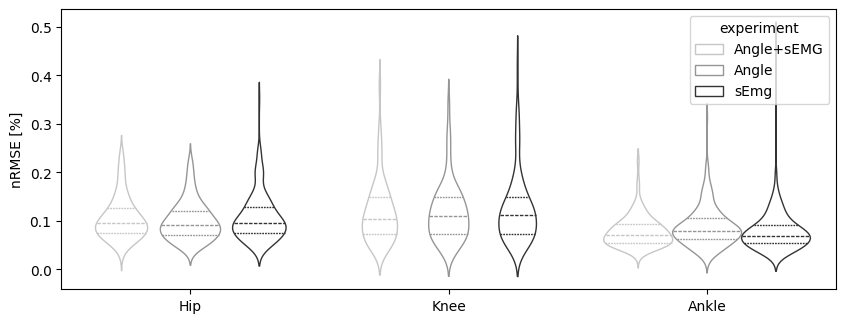

In [ ]:
di = {'nrmse_hip_flexion':'Hip',
      'nrmse_knee_flexion':'Knee',
      'nrmse_ankle_flexion':'Ankle'
      }

diexp = {'angle':'Angle',
      'emg':'sEmg',
      'both':'Angle+sEMG'
      }

df_melted_nrmse_cols_plot = df_melted_nrmse_cols.copy()
df_melted_nrmse_cols_plot['variable'] = df_melted_nrmse_cols['variable'].map(di)
df_melted_nrmse_cols_plot['experiment'] = df_melted_nrmse_cols['experiment'].map(diexp)

plt.figure(figsize=(10, 8))
ax1 = plt.subplot(2,1,1)
sns.violinplot(data=df_melted_nrmse_cols_plot, x="variable", y="value", hue='experiment', ax=ax1, fill=False
               , linewidth=1, linecolor="k", inner="quart", palette=[(0.7777777777777778, 0.7777777777777778, 0.7777777777777778),
  (0.586082276047674, 0.586082276047674, 0.586082276047674),
  (0.2011534025374856, 0.2011534025374856, 0.2011534025374856)])

ax1.set_xlabel('')
ax1.set_ylabel('nRMSE [%]')
plt.show()

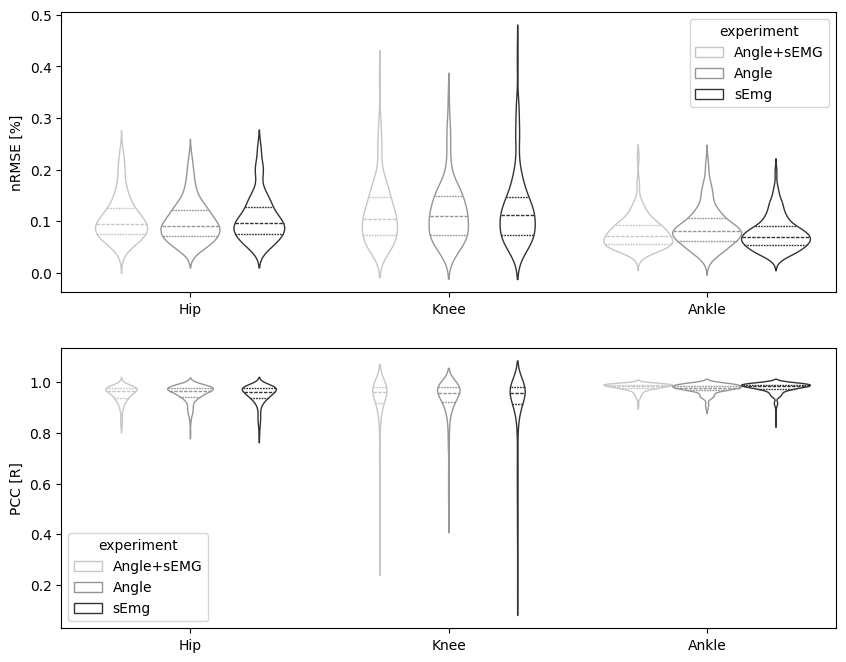

In [ ]:
di = {'nrmse_hip_flexion':'Hip',
      'nrmse_knee_flexion':'Knee',
      'nrmse_ankle_flexion':'Ankle'
      }

diexp = {'angle':'Angle',
      'emg':'sEmg',
      'both':'Angle+sEMG'
      }

df_melted_nrmse_cols_plot = df_melted_nrmse_cols.copy()
df_melted_nrmse_cols_plot['variable'] = df_melted_nrmse_cols['variable'].map(di)
df_melted_nrmse_cols_plot['experiment'] = df_melted_nrmse_cols['experiment'].map(diexp)

plt.figure(figsize=(10, 8))
ax1 = plt.subplot(2,1,1)
sns.violinplot(data=df_melted_nrmse_cols_plot, x="variable", y="value", hue='experiment', ax=ax1, fill=False,
               linewidth=1, linecolor="k", inner="quart", palette=[(0.7777777777777778, 0.7777777777777778, 0.7777777777777778),
  (0.586082276047674, 0.586082276047674, 0.586082276047674),
  (0.2011534025374856, 0.2011534025374856, 0.2011534025374856)])

ax1.set_xlabel('')
ax1.set_ylabel('nRMSE [%]')

####
di = {'corr_hip_flexion':'Hip',
      'corr_knee_flexion':'Knee',
      'corr_ankle_flexion':'Ankle'
      }

df_melted_corr_cols_plot = df_melted_corr_cols.copy()
df_melted_corr_cols_plot['variable'] = df_melted_corr_cols_plot['variable'].map(di)
df_melted_corr_cols_plot['experiment'] = df_melted_corr_cols_plot['experiment'].map(diexp)

ax2 = plt.subplot(2,1,2)
sns.violinplot(data=df_melted_corr_cols_plot, x="variable", y="value", hue='experiment', ax=ax2, fill=False,
               linewidth=1, linecolor="k", inner="quart", palette=[(0.7777777777777778, 0.7777777777777778, 0.7777777777777778),
  (0.586082276047674, 0.586082276047674, 0.586082276047674),
  (0.2011534025374856, 0.2011534025374856, 0.2011534025374856)] , cut=2, common_norm=False, hue_norm=None)
# ax2.set_ylim([0.7, 1.1])
ax2.set_xlabel('')
ax2.set_ylabel('PCC [R]')

plt.show()

<ipython-input-26-aba3ea0dd45b>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabels, size=12)
<ipython-input-26-aba3ea0dd45b>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabels, size=12)
<ipython-input-26-aba3ea0dd45b>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabels, size=12)
<ipython-input-26-aba3ea0dd45b>:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(xlabels, size=12)
<ipython-input-26-aba3ea0dd45b>:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(xlabels, size=12)
<ipython-input-26-aba3ea0dd45b>:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(xlabels, size=12)


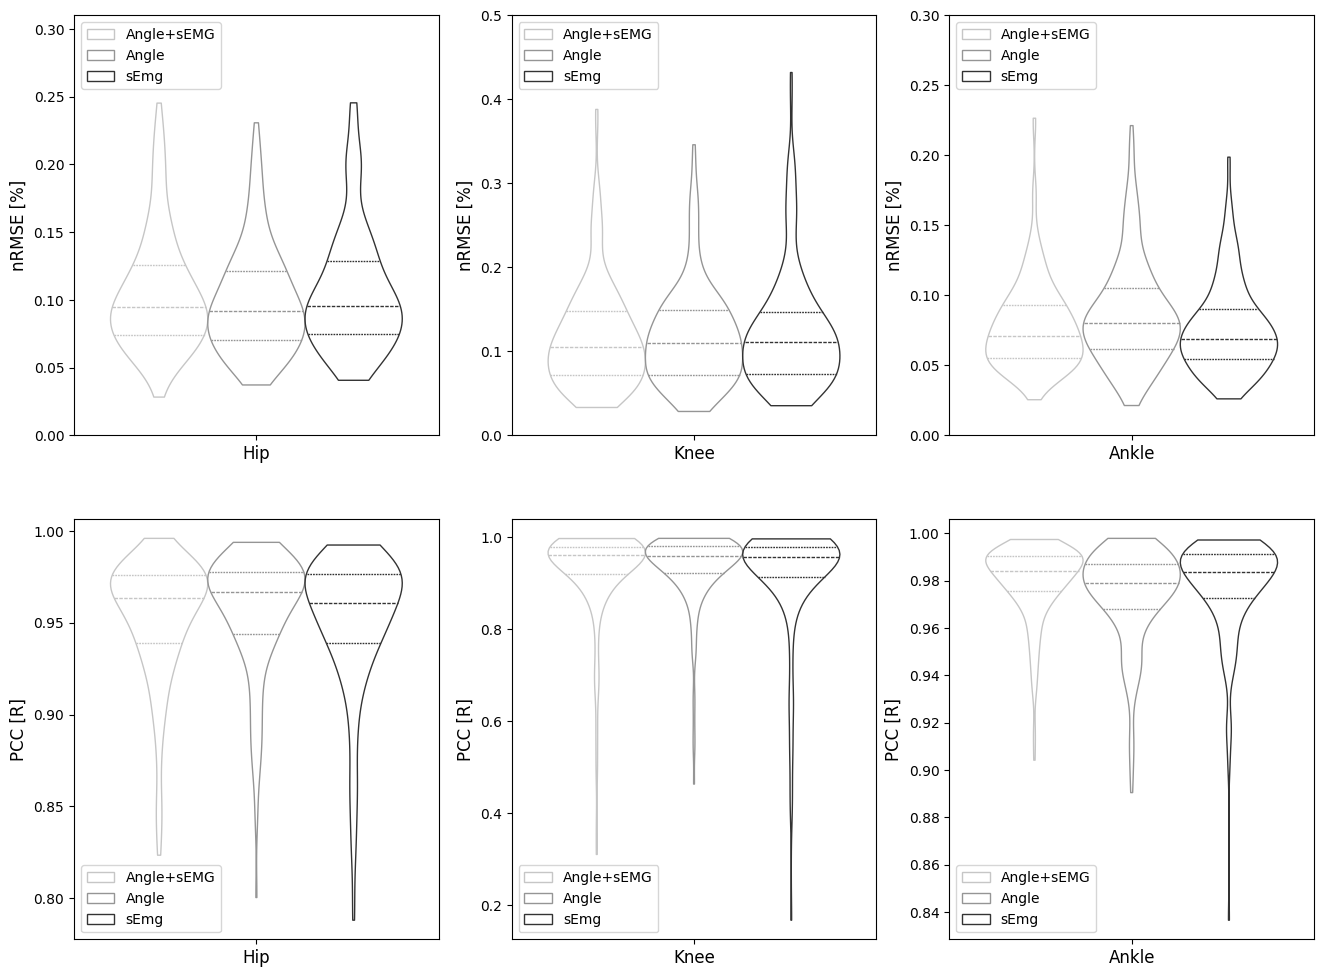

In [ ]:
di = {'nrmse_hip_flexion':'Hip',
      'nrmse_knee_flexion':'Knee',
      'nrmse_ankle_flexion':'Ankle'
      }

diexp = {'angle':'Angle',
      'emg':'sEmg',
      'both':'Angle+sEMG'
      }

plt.figure(figsize=(16, 12))

df_melted_nrmse_cols_plot = df_melted_nrmse_cols.copy()
df_melted_nrmse_cols_plot['variable'] = df_melted_nrmse_cols['variable'].map(di)
df_melted_nrmse_cols_plot['experiment'] = df_melted_nrmse_cols['experiment'].map(diexp)

for i, v in enumerate(df_melted_nrmse_cols_plot['variable'].unique()):
  df_melted_nrmse_cols_plot_ = df_melted_nrmse_cols_plot[df_melted_nrmse_cols_plot['variable']==v]

  ax1 = plt.subplot(2,3,i+1)
  sns.violinplot(data=df_melted_nrmse_cols_plot_, x="variable", y="value", hue='experiment', ax=ax1, fill=False,
                linewidth=1, linecolor="k", inner="quart", palette=[(0.7777777777777778, 0.7777777777777778, 0.7777777777777778),
    (0.586082276047674, 0.586082276047674, 0.586082276047674),
    (0.2011534025374856, 0.2011534025374856, 0.2011534025374856)] , cut=0)

  ax1.set_xlabel('')
  # get label text
  _, xlabels = plt.xticks()
  # set the x-labels with
  ax1.set_xticklabels(xlabels, size=12)

  ax1.set_ylabel('nRMSE [%]', fontsize=12)
  if i == 0:
    ax1.set_ylim([0, 0.31])
  elif i==1:
    ax1.set_ylim([0, 0.5])
  elif i==2:
    ax1.set_ylim([0, 0.3])
  ax1.legend(title=False, fontsize=10, loc='upper left')

####
di = {'corr_hip_flexion':'Hip',
      'corr_knee_flexion':'Knee',
      'corr_ankle_flexion':'Ankle'
      }

df_melted_corr_cols_plot = df_melted_corr_cols.copy()
df_melted_corr_cols_plot['variable'] = df_melted_corr_cols_plot['variable'].map(di)
df_melted_corr_cols_plot['experiment'] = df_melted_corr_cols_plot['experiment'].map(diexp)

for i, v in enumerate(df_melted_corr_cols_plot['variable'].unique()):
  df_melted_corr_cols_plot_ = df_melted_corr_cols_plot[df_melted_corr_cols_plot['variable']==v]

  ax2 = plt.subplot(2,3,i+4)
  sns.violinplot(data=df_melted_corr_cols_plot_, x="variable", y="value", hue='experiment', ax=ax2, fill=False,
                linewidth=1, linecolor="k", inner="quart", palette=[(0.7777777777777778, 0.7777777777777778, 0.7777777777777778),
    (0.586082276047674, 0.586082276047674, 0.586082276047674),
    (0.2011534025374856, 0.2011534025374856, 0.2011534025374856)] , cut=0, common_norm=False, hue_norm=None)
  # ax2.set_ylim([0.7, 1.1])
  ax2.set_xlabel('')

  # get label text
  _, xlabels = plt.xticks()
  # set the x-labels with
  ax2.set_xticklabels(xlabels, size=12)

  ax2.set_ylabel('PCC [R]', fontsize=12)
  ax2.legend(title=False, fontsize=10)

plt.show()

In [ ]:
df_melted_nrmse_cols_plot['value'].mean()+3*df_melted_nrmse_cols_plot['value'].std()
sub_data = df_melted_nrmse_cols_plot[df_melted_nrmse_cols_plot['experiment']=='Angle']
sub_data['value'].mean()-3*sub_data['value'].std(), sub_data['value'].mean()+3*sub_data['value'].std()

sub_data = df_melted_nrmse_cols_plot[df_melted_nrmse_cols_plot['experiment']=='Angle+sEMG']
q1, q3 = np.percentile(sub_data['value'], [25, 75])
whisker_low_both = q1 - (q3 - q1) * 1.5
whisker_high_both = q3 + (q3 - q1) * 1.5

sub_data = df_melted_nrmse_cols_plot[df_melted_nrmse_cols_plot['experiment']=='sEmg']
q1, q3 = np.percentile(sub_data['value'], [25, 75])
whisker_low_emg = q1 - (q3 - q1) * 1.5
whisker_high_emg = q3 + (q3 - q1) * 1.5

sub_data = df_melted_nrmse_cols_plot[df_melted_nrmse_cols_plot['experiment']=='Angle']
q1, q3 = np.percentile(sub_data['value'], [25, 75])
whisker_low_angle = q1 - (q3 - q1) * 1.5
whisker_high_angle = q3 + (q3 - q1) * 1.5

((df_melted_nrmse_cols_plot['experiment']=='Angle+sEMG')&(df_melted_nrmse_cols_plot['value'] < whisker_high_both)&(df_melted_nrmse_cols_plot['value'] > whisker_low_both))|
((df_melted_nrmse_cols_plot['experiment']=='sEmg')&(df_melted_nrmse_cols_plot['value'] < whisker_high_emg)&(df_melted_nrmse_cols_plot['value'] > whisker_low_emg))|
((df_melted_nrmse_cols_plot['experiment']=='Angle')&(df_melted_nrmse_cols_plot['value'] < whisker_high_angle)&(df_melted_nrmse_cols_plot['value'] > whisker_low_angle))

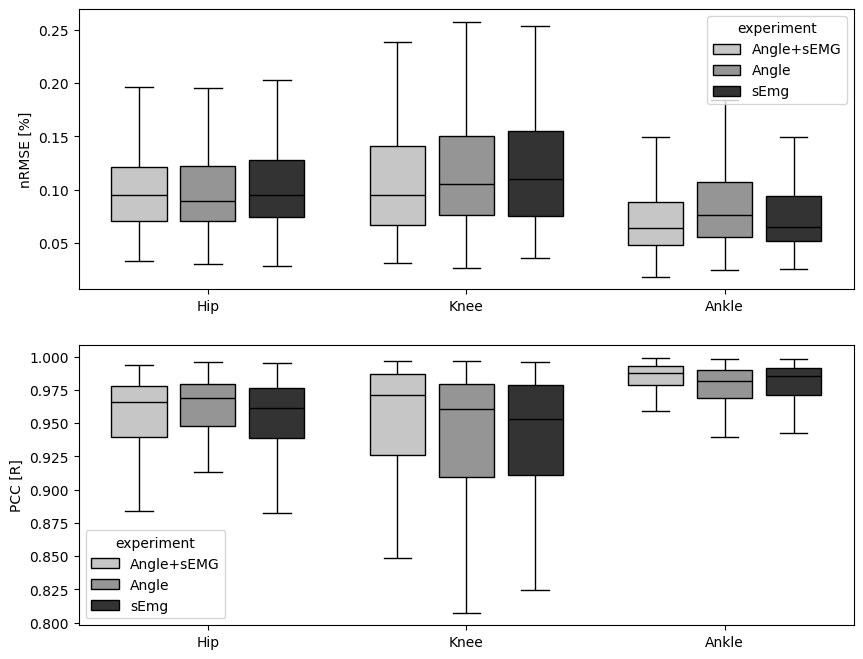

In [ ]:
di = {'nrmse_hip_flexion':'Hip',
      'nrmse_knee_flexion':'Knee',
      'nrmse_ankle_flexion':'Ankle'
      }

diexp = {'angle':'Angle',
      'emg':'sEmg',
      'both':'Angle+sEMG'
      }

df_melted_nrmse_cols_plot = df_melted_nrmse_cols.copy()
df_melted_nrmse_cols_plot['variable'] = df_melted_nrmse_cols['variable'].map(di)
df_melted_nrmse_cols_plot['experiment'] = df_melted_nrmse_cols['experiment'].map(diexp)

plt.figure(figsize=(10, 8))
ax1 = plt.subplot(2,1,1)
sns.boxplot(data=df_melted_nrmse_cols_plot, x="variable", y="value", hue='experiment', ax=ax1, showfliers = False, gap=0.2
               , linewidth=1, linecolor="k", palette=[(0.7777777777777778, 0.7777777777777778, 0.7777777777777778),
  (0.586082276047674, 0.586082276047674, 0.586082276047674),
  (0.2011534025374856, 0.2011534025374856, 0.2011534025374856)])

ax1.set_xlabel('')
ax1.set_ylabel('nRMSE [%]')

####
di = {'corr_hip_flexion':'Hip',
      'corr_knee_flexion':'Knee',
      'corr_ankle_flexion':'Ankle'
      }

df_melted_corr_cols_plot = df_melted_corr_cols.copy()
df_melted_corr_cols_plot['variable'] = df_melted_corr_cols_plot['variable'].map(di)
df_melted_corr_cols_plot['experiment'] = df_melted_corr_cols_plot['experiment'].map(diexp)

ax2 = plt.subplot(2,1,2)
sns.boxplot(data=df_melted_corr_cols_plot, x="variable", y="value", hue='experiment', ax=ax2, showfliers = False, gap=0.2
               , linewidth=1, linecolor="k", palette=[(0.7777777777777778, 0.7777777777777778, 0.7777777777777778),
  (0.586082276047674, 0.586082276047674, 0.586082276047674),
  (0.2011534025374856, 0.2011534025374856, 0.2011534025374856)] )
# ax2.set_ylim([0.7, 1.1])
ax2.set_xlabel('')
ax2.set_ylabel('PCC [R]')

plt.show()

In [ ]:
np.random.randint(0,199,1)[0]
df_results_overall_combined.loc[df_results_overall_combined.corr_hip_flexion.idxmax()].test_df_idx

351

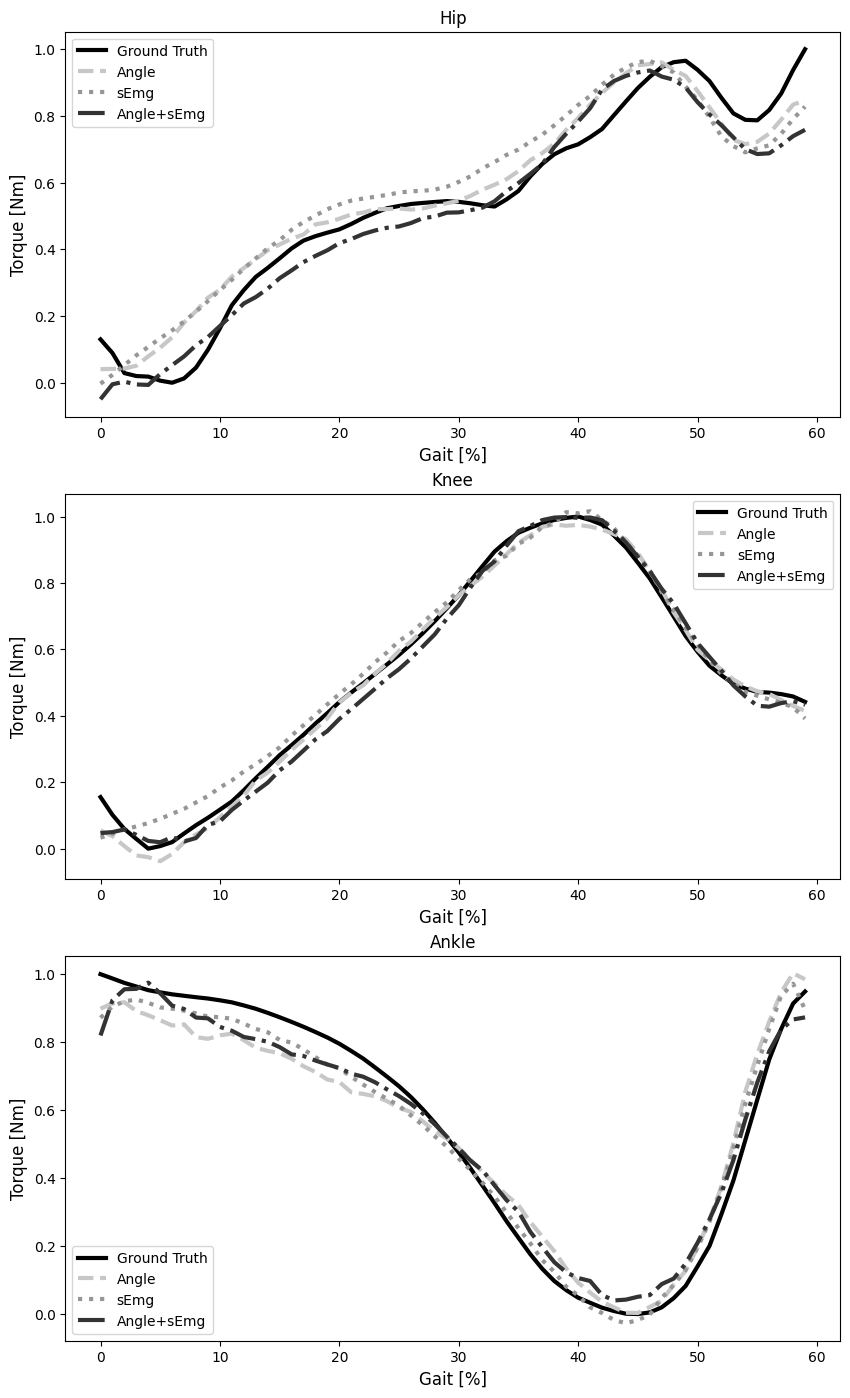

In [ ]:
import matplotlib.pyplot as plt


def plot_pred3(df_results_overall_combined, i):
    fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(10, 17))
    for ii in range(3):
        if ii == 0:
            title_txt = 'Hip'
            selected_axis = 'hip_flexion'
        elif ii == 1:
            title_txt = 'Knee'
            selected_axis = 'knee_flexion'
        else:
            title_txt = 'Ankle'
            selected_axis = 'ankle_flexion'

        label_sig = df_results_overall_combined.loc[(df_results_overall_combined.test_df_idx == i) &
                                                    (df_results_overall_combined.experiment == 'angle'),
                                                    'label_' + selected_axis].values[0]
        prediction_sig1 = df_results_overall_combined.loc[(df_results_overall_combined.test_df_idx == i) &
                                                          (df_results_overall_combined.experiment == 'angle'),
                                                          'pred_' + selected_axis].values[0]
        prediction_sig2 = df_results_overall_combined.loc[(df_results_overall_combined.test_df_idx == i) &
                                                          (df_results_overall_combined.experiment == 'emg'),
                                                          'pred_' + selected_axis].values[0]
        prediction_sig3 = df_results_overall_combined.loc[(df_results_overall_combined.test_df_idx == i) &
                                                          (df_results_overall_combined.experiment == 'both'),
                                                          'pred_' + selected_axis].values[0]

        ax[ii].plot(label_sig, 'k', linewidth=3)
        ax[ii].plot(prediction_sig1, '--', linewidth=3, color=(0.78, 0.78, 0.78))
        ax[ii].plot(prediction_sig2, ':', linewidth=3, color=(0.59, 0.59, 0.59))
        ax[ii].plot(prediction_sig3, '-.', linewidth=3, color=(0.20, 0.20, 0.20))
        # ax[ii].plot(label_sig, 'k--', linewidth=3)
        # ax[ii].plot(prediction_sig1, linewidth=3, color=(0.78, 0.78, 0.78))
        # ax[ii].plot(prediction_sig2, linewidth=3, color=(0.59, 0.59, 0.59))
        # ax[ii].plot(prediction_sig3, linewidth=3, color=(0.20, 0.20, 0.20))
        ax[ii].legend(['Ground Truth', 'Angle', 'sEmg', 'Angle+sEmg'])
        ax[ii].set_title(title_txt)

        ax[ii].set_ylabel('Torque [Nm]', fontsize=12)
        ax[ii].set_xlabel('Gait [%]', fontsize=12)

    plt.show()

i = 74
plot_pred3(df_results_overall_combined, i)

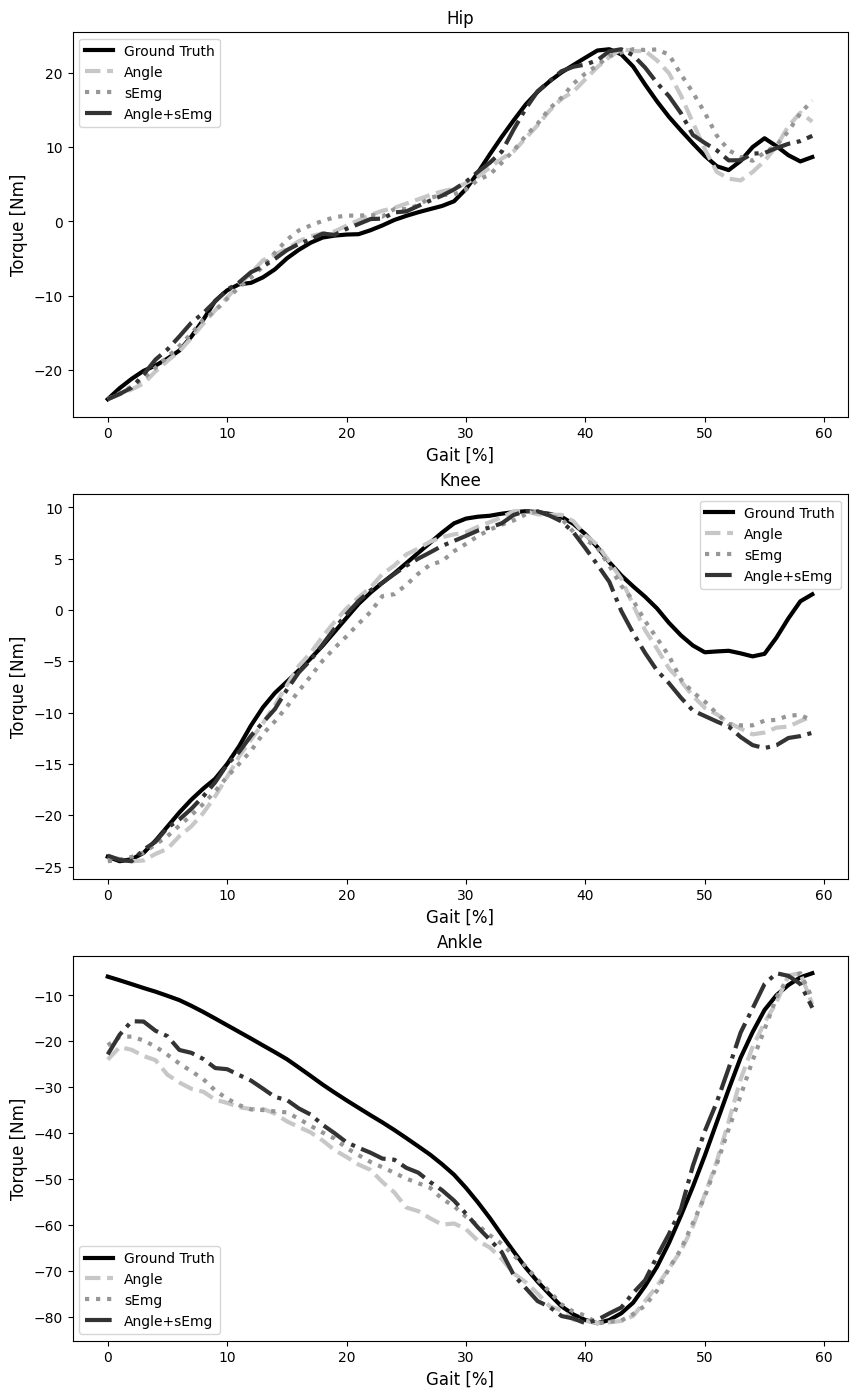

In [ ]:
import matplotlib.pyplot as plt


def plot_pred3(df_results_overall_combined, i):
    fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(10, 17))
    for ii in range(3):
        if ii == 0:
            title_txt = 'Hip'
            selected_axis = 'hip_flexion'
        elif ii == 1:
            title_txt = 'Knee'
            selected_axis = 'knee_flexion'
        else:
            title_txt = 'Ankle'
            selected_axis = 'ankle_flexion'

        label_sig = df_results_overall_combined.loc[(df_results_overall_combined.test_df_idx == i) &
                                                    (df_results_overall_combined.experiment == 'angle'),
                                                    'label_' + selected_axis+'_rescaled'].values[0]
        prediction_sig1 = df_results_overall_combined.loc[(df_results_overall_combined.test_df_idx == i) &
                                                          (df_results_overall_combined.experiment == 'angle'),
                                                          'pred_' + selected_axis+'_rescaled'].values[0]
        prediction_sig2 = df_results_overall_combined.loc[(df_results_overall_combined.test_df_idx == i) &
                                                          (df_results_overall_combined.experiment == 'emg'),
                                                          'pred_' + selected_axis+'_rescaled'].values[0]
        prediction_sig3 = df_results_overall_combined.loc[(df_results_overall_combined.test_df_idx == i) &
                                                          (df_results_overall_combined.experiment == 'both'),
                                                          'pred_' + selected_axis+'_rescaled'].values[0]

        ax[ii].plot(label_sig, 'k', linewidth=3)
        ax[ii].plot(prediction_sig1, '--', linewidth=3, color=(0.78, 0.78, 0.78))
        ax[ii].plot(prediction_sig2, ':', linewidth=3, color=(0.59, 0.59, 0.59))
        ax[ii].plot(prediction_sig3, '-.', linewidth=3, color=(0.20, 0.20, 0.20))
        # ax[ii].plot(label_sig, 'k--', linewidth=3)
        # ax[ii].plot(prediction_sig1, linewidth=3, color=(0.78, 0.78, 0.78))
        # ax[ii].plot(prediction_sig2, linewidth=3, color=(0.59, 0.59, 0.59))
        # ax[ii].plot(prediction_sig3, linewidth=3, color=(0.20, 0.20, 0.20))
        ax[ii].legend(['Ground Truth', 'Angle', 'sEmg', 'Angle+sEmg'])
        ax[ii].set_title(title_txt)

        ax[ii].set_ylabel('Torque [Nm]', fontsize=12)
        ax[ii].set_xlabel('Gait [%]', fontsize=12)

    plt.show()

i = 351
plot_pred3(df_results_overall_combined, i)

In [ ]:
data_to_plot = {}
exp_list = ['angle', 'emg', 'both', 'label']
jnt_list = ['hip', 'knee', 'ankle']

for jnt in jnt_list:
  data_to_plot_sub = {}
  for exp in exp_list:
    if exp == 'label':
      col = 'label_'+jnt+'_flexion_rescaled'
      p = df_results_overall_combined[df_results_overall_combined['experiment']=='both'][col][0]
      data_in_df = pd.DataFrame(p).T
      for i, p in enumerate(df_results_overall_combined[df_results_overall_combined['experiment']=='both'][col]):
        data_in_df.loc[i] = p

    else:
      col = 'pred_'+jnt+'_flexion_rescaled'
      p = df_results_overall_combined[df_results_overall_combined['experiment']==exp][col].iloc[0]
      data_in_df = pd.DataFrame(p).T
      for i, p in enumerate(df_results_overall_combined[df_results_overall_combined['experiment']==exp][col]):
        data_in_df.loc[i] = p

    data_to_plot_sub[exp] = {'data':data_in_df, 'mean':data_in_df.mean(), 'std':data_in_df.std()}

  data_to_plot[jnt] = data_to_plot_sub

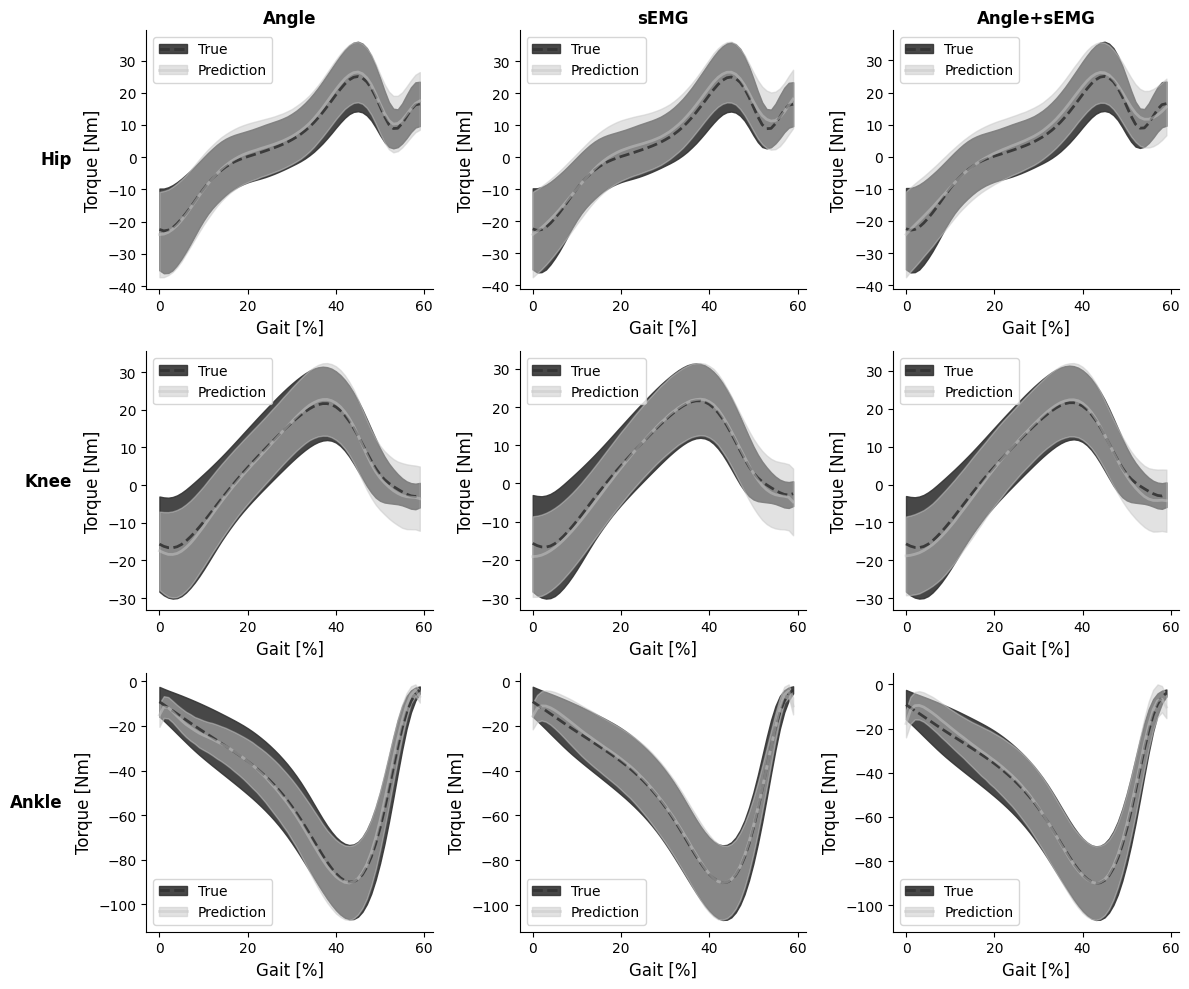

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(12, 10))
for i, jnt in enumerate(jnt_list):
  for j, exp in enumerate(exp_list[:3]):

    ax = axes[i][j]

    standard_deviations = 1
    smooth_path = data_to_plot[jnt]['label']['mean']
    path_deviation = data_to_plot[jnt]['label']['std']
    under_line = (smooth_path - standard_deviations * path_deviation)
    over_line = (smooth_path + standard_deviations * path_deviation)

    smooth_path1 = data_to_plot[jnt][exp]['mean']
    path_deviation1 = data_to_plot[jnt][exp]['std']
    under_line1 = (smooth_path1 - standard_deviations * path_deviation1)
    over_line1 = (smooth_path1 + standard_deviations * path_deviation1)

    # ax.plot(path_deviation.index, smooth_path, linewidth=2) #mean curve.
    # ax.fill_between(path_deviation.index, under_line, over_line, color='b', alpha=.1) #std curves.

    # ax.plot(path_deviation1.index, smooth_path, 'r-', linewidth=2) #mean curve.
    # ax.fill_between(path_deviation1.index, under_line1, over_line1, color='r', alpha=.1) #std curves.


    # ax.plot(path_deviation.index, smooth_path, color=(0.20, 0.20, 0.20), linestyle='--', linewidth=2, alpha=.9) #mean curve.
    # ax.plot(path_deviation1.index, smooth_path1, color=(0.78, 0.78, 0.78), linestyle='-', linewidth=2, alpha=.5) #mean curve.

    # ax.fill_between(path_deviation.index, under_line, over_line, color=(0.20, 0.20, 0.20), alpha=.9) #std curves.
    # ax.fill_between(path_deviation1.index, under_line1, over_line1, color=(0.78, 0.78, 0.78), alpha=.5) #std curves.

    ax.fill_between(path_deviation.index, under_line, over_line, color=(0.20, 0.20, 0.20), alpha=.9) #std curves.
    p1 = ax.plot(path_deviation.index, smooth_path, color=(0.20, 0.20, 0.20), linestyle='--', linewidth=2, alpha=.9) #mean curve.
    p2 = ax.fill(np.NaN, np.NaN, color=(0.20, 0.20, 0.20), alpha=.9)

    ax.fill_between(path_deviation1.index, under_line1, over_line1, color=(0.78, 0.78, 0.78), alpha=.5) #std curves.
    p3 = ax.plot(path_deviation1.index, smooth_path1, color=(0.78, 0.78, 0.78), linestyle='-', linewidth=2, alpha=.5) #mean curve.
    p4 = ax.fill(np.NaN, np.NaN, color=(0.78, 0.78, 0.78), alpha=.5)



    # ax.set_title(jnt+'-'+exp)
    ax.set_ylabel('Torque [Nm]', fontsize=12)
    ax.set_xlabel('Gait [%]', fontsize=12)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

    # ax.legend(['True', 'Prediction'])
    ax.legend([(p2[0], p1[0]), (p4[0], p3[0])], ['True', 'Prediction'])

exp_list_title = ['Angle', 'sEMG', 'Angle+sEMG']
jnt_list_title = ['Hip', 'Knee', 'Ankle']

pad = 5 # in points
for ax, col in zip(axes[0], exp_list_title):
  ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
              xycoords='axes fraction', textcoords='offset points',
              size='large', ha='center', va='baseline', weight='bold')

for ax, row in zip(axes[:,0], jnt_list_title):
  ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
              xycoords=ax.yaxis.label, textcoords='offset points',
              size='large', ha='right', va='center', weight='bold')

fig.tight_layout()